In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Internship DevelopersHub tasks\Phase 2\Task 2\Mall Customers.csv")
df


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [14]:
df.columns = [c.strip() for c in df.columns]  # clean names

In [15]:
# Shape & info
print("Shape:", df.shape)
print(df.info())
print("\nMissing values:\n", df.isna().sum())

Shape: (200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB
None

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


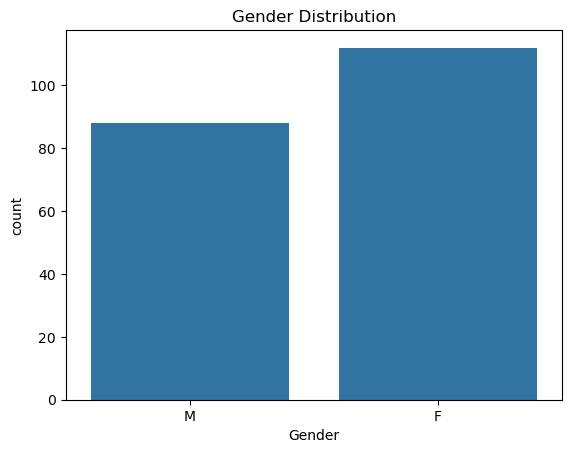

In [17]:
# Distribution of Gender
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

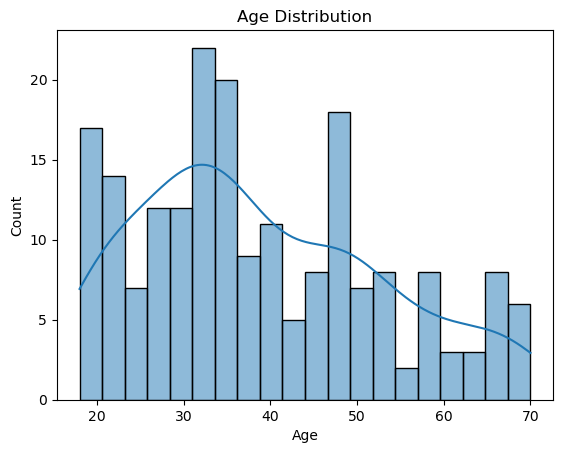

In [18]:
# Age distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

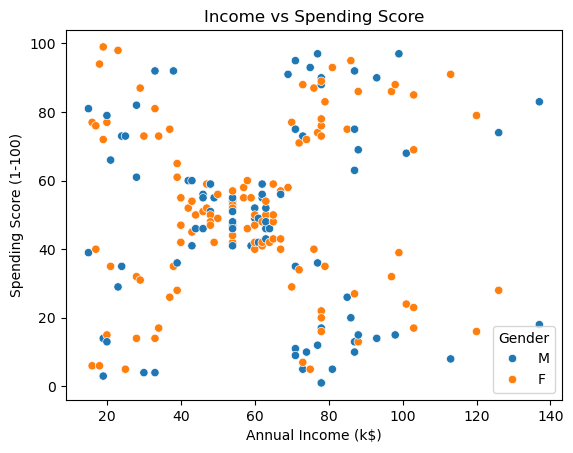

In [19]:
# Income vs Spending scatterplot
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Income vs Spending Score")
plt.show()

### **Apply K-Means Clustering**

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

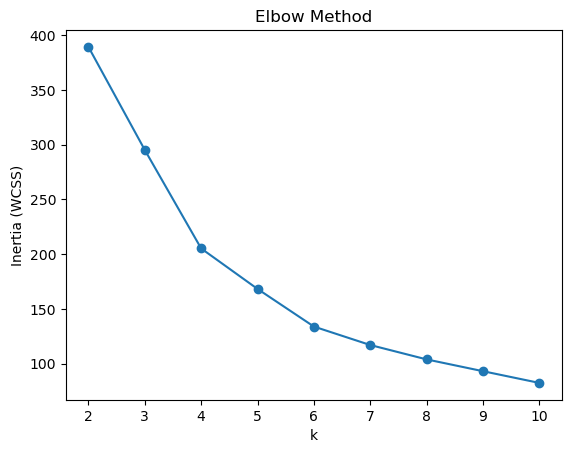

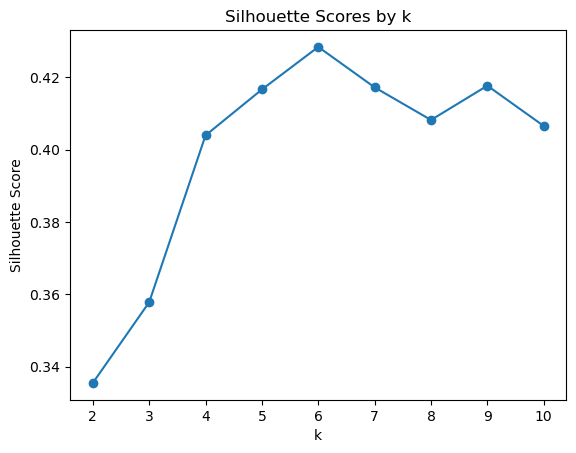

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster sizes:
 cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features (common: Age, Income, Spending Score)
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
sil_scores = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow
plt.plot(K_range, inertia, "o-")
plt.xlabel("k")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

# Plot silhouette scores
plt.plot(K_range, sil_scores, "o-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores by k")
plt.show()

# Choose k (e.g., 5) and fit
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
df["cluster"] = kmeans.fit_predict(X_scaled)

print("Cluster sizes:\n", df["cluster"].value_counts())


### **Visualize Clusters (PCA & t-SNE)**

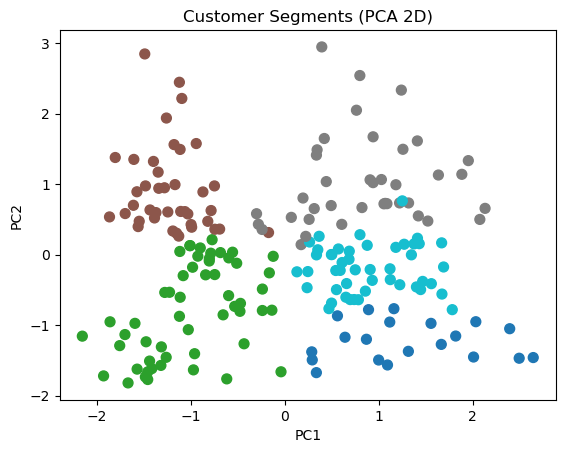

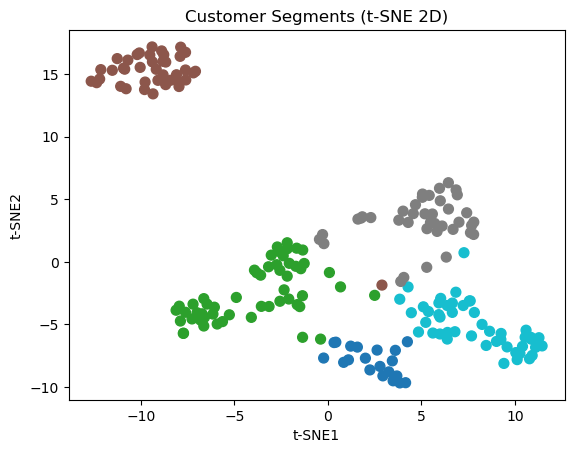

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df["cluster"], cmap="tab10", s=50)
plt.title("Customer Segments (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# t-SNE (slower but nice separation)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["cluster"], cmap="tab10", s=50)
plt.title("Customer Segments (t-SNE 2D)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()


### **Suggest Marketing Strategies**

In [22]:
cluster_profile = df.groupby("cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_profile)


               Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064
